In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
data = pd.read_csv('evaluate.csv')
data

,pkid,backend,strategy,ARG,in_constraints_probs,best_solution_probs,iteration_count
0,0,FakeTorino,"[1, 0, 0]",181.60892427884616,0.68359375,0,33
1,0,FakeTorino,"[1, 1, 0]",181.20342548076923,0.5859375,0,32
2,0,FakeTorino,"[1, 0, 1]","[103.85201322115384, 126.49045973557692]","[11.328125, 14.2578125]","[0, 0]","[28, 33]"
3,0,FakeTorino,"[1, 1, 1]","[117.45440204326923, 138.890625]","[6.0546875, 11.5234375]","[0, 0]","[32, 36]"
4,0,FakeBrisbane,"[1, 0, 0]",211.17037259615384,0.09765625,0,24
5,0,FakeBrisbane,"[1, 1, 0]",197.234375,0,0,28
6,0,FakeBrisbane,"[1, 0, 1]","[130.81482872596155, 212.2264122596154]","[6.15234375, 3.515625]","[0.09765625, 0]","[27, 28]"
7,0,FakeBrisbane,"[1, 1, 1]","[141.68013822115384, 203.43719951923077]","[4.4921875, 3.90625]","[0, 0]","[32, 25]"
8,1,FakeTorino,"[1, 0, 0]",1621.8017578125,0.1953125,0.09765625,30
9,1,FakeTorino,"[1, 1, 0]",1592.30517578125,0.29296875,0.09765625,22


In [2]:
data.strategy = data.strategy.apply(lambda x: 0 if x == '[1, 0, 0]' else 1 if x == '[1, 0, 1]' else 2 if x == '[1, 1, 0]' else 3 if x == '[1, 1, 1]' else x)
data = data[data['best_solution_probs'] != 'timeout']
data

,pkid,backend,strategy,ARG,in_constraints_probs,best_solution_probs,iteration_count
0,0,FakeTorino,0,181.60892427884616,0.68359375,0,33
1,0,FakeTorino,2,181.20342548076923,0.5859375,0,32
2,0,FakeTorino,1,"[103.85201322115384, 126.49045973557692]","[11.328125, 14.2578125]","[0, 0]","[28, 33]"
3,0,FakeTorino,3,"[117.45440204326923, 138.890625]","[6.0546875, 11.5234375]","[0, 0]","[32, 36]"
4,0,FakeBrisbane,0,211.17037259615384,0.09765625,0,24
5,0,FakeBrisbane,2,197.234375,0,0,28
6,0,FakeBrisbane,1,"[130.81482872596155, 212.2264122596154]","[6.15234375, 3.515625]","[0.09765625, 0]","[27, 28]"
7,0,FakeBrisbane,3,"[141.68013822115384, 203.43719951923077]","[4.4921875, 3.90625]","[0, 0]","[32, 25]"
8,1,FakeTorino,0,1621.8017578125,0.1953125,0.09765625,30
9,1,FakeTorino,2,1592.30517578125,0.29296875,0.09765625,22


In [3]:
import pandas as pd
import ast

# 读取数据
data = pd.read_csv('evaluate.csv')

# 定义一个函数来处理 best_solution_probs 列的每个值
def process_value(value):
    try:
        # 将字符串表示的列表转换为实际的列表
        value = ast.literal_eval(value)
    except (ValueError, SyntaxError):
        # 如果转换失败，则认为它是数字
        pass
    
    # 如果是列表，取最大值；如果是数字，直接返回
    if isinstance(value, list):
        return sum(value) / len(value)
    else:
        return value

# 使用 .loc 明确地对 DataFrame 进行操作
data.loc[:, 'best_solution_probs'] = data['best_solution_probs'].apply(process_value)

# 如果需要，保存处理后的数据到新的 CSV 文件
# data.to_csv('evaluate_processed.csv', index=False)


In [4]:
data = data[["strategy", "best_solution_probs"]]
data.strategy = data.strategy.apply(lambda x: 0 if x == '[1, 0, 0]' else 1 if x == '[1, 0, 1]' else 2 if x == '[1, 1, 0]' else 3 if x == '[1, 1, 1]' else x)

data

,strategy,best_solution_probs
0,0,0
1,2,0
2,1,0.0
3,3,0.0
4,0,0
5,2,0
6,1,0.048828
7,3,0.0
8,0,0.097656
9,2,0.097656


In [5]:
data = data[data['best_solution_probs'] != 'timeout']
data = data[data['strategy'] < 4]

In [6]:
data = data.groupby(['strategy']).mean().reset_index()
data

,strategy,best_solution_probs
0,0,0.032552
1,1,0.036621
2,2,0.07673
3,3,0.097656


In [7]:
# data = data.pivot(index ='strategy', columns='pkid', values=["best_solution_probs"])
# data

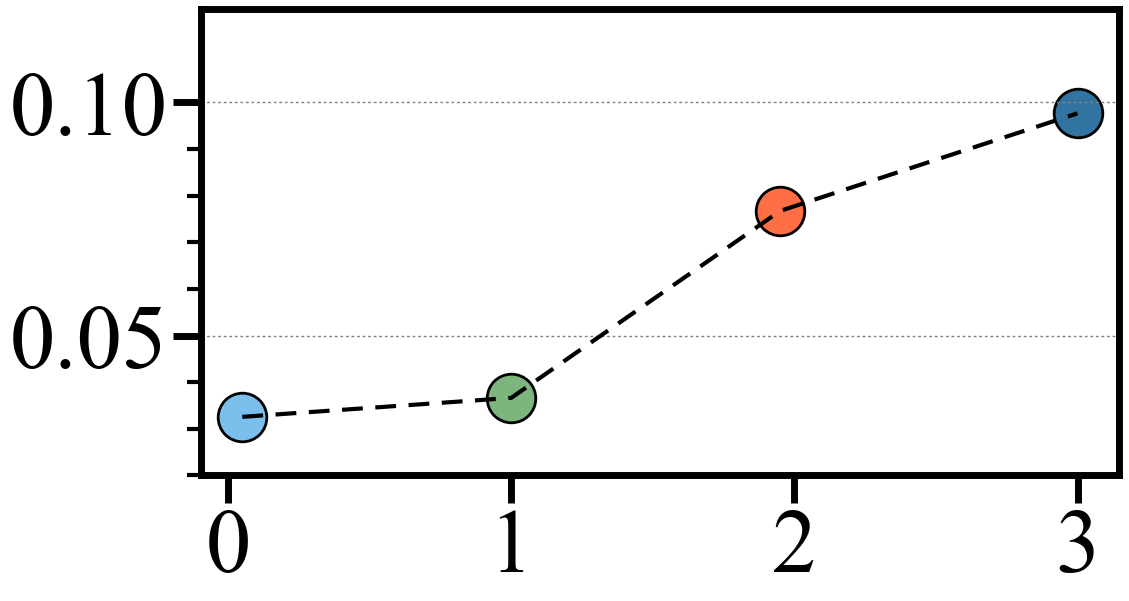

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
scale = 1.05
fig= plt.figure(figsize=(25*scale, 12*scale))
mpl.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Times New Roman',
    'font.size': 65,
    'axes.unicode_minus': False,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.linewidth': 5,
    'xtick.major.size': 20,
    'xtick.major.width': 5,
    'xtick.minor.size': 10,
    'xtick.minor.width': 3,
    'ytick.minor.size': 10,
    'ytick.minor.width': 3,
    'ytick.major.size': 20,
    'ytick.major.width': 5,
    "lines.markersize" : 35,
    "markers.fillstyle" :  'full',
    # 'lines.markerfacecolor': '#f8d941',
    "lines.markeredgewidth" : 2,
    'lines.markeredgecolor': 'black',
})
bar_width = 0.118
shrink = 0.05

colors = ["#7CBEEC", "#7EB57E", "#FF6F45", "#3274A1"]
labels = ['depth', 'rss usage (MB)']
# for i, metric in enumerate( ["culled_depth",'rss_usage']):
i = 0
axes = plt.axes([0, 0, 0.35, 0.37])
ylabel = 'depth'

indexs = [i for i in np.arange(0, len(data.index.values))]
for i in range(0, len(indexs) - 1, 3):
    indexs[i] += shrink
    indexs[i + 2] -= shrink

ymetric = "best_solution_probs" # best_solution_probs
# axes.bar([index for index in indexs], data[ymetric][0].apply(lambda x: float(x) if x != 'timeout' else np.nan), linewidth=3, edgecolor='black', width=bar_width, label="bit = 1",
#         color=colors[0])
# axes.bar([index + 4 for index in indexs], data[ymetric][1].apply(lambda x: float(x) if x != 'timeout' else np.nan), linewidth=3, edgecolor='black', width=bar_width, label="bit = 2",
#         color=colors[1])
# axes.bar([index + 8 for index in indexs], data[ymetric][2].apply(lambda x: float(x) if x != 'timeout' else np.nan), linewidth=3, edgecolor='black', width=bar_width, label="bit = 3",
#         color=colors[2])
# axes.plot(indexs, data[ymetric][0].apply(lambda x: float(x) if x != 'timeout' else np.nan), linestyle=(0, (5, 3)), marker='o', color=colors[0], linewidth=3, label="bit = 1")
# axes.plot([x + 4 for x in indexs], data[ymetric][1].apply(lambda x: float(x) if x != 'timeout' else np.nan), linestyle=(0, (5, 3)), marker='o', color=colors[1], linewidth=3, label="bit = 2")
# axes.plot([x + 8 for x in indexs], data[ymetric][2].apply(lambda x: float(x) if x != 'timeout' else np.nan), linestyle=(0, (5, 3)), marker='o', color=colors[2], linewidth=3, label="bit = 3")
# axes.plot(indexs, [float(y) if y != 'timeout' else np.nan for y in data[ymetric][0]], linestyle=(0, (5, 3)), linewidth=3, color='black')
# for i, (x, y) in enumerate(zip(indexs, data[ymetric][0])):
#     if y != 'timeout':
#         axes.scatter(x, float(y), color=colors[i], edgecolor='black', linewidths=2)


axes.plot([x for x in indexs], [float(y) if y != 'timeout' else np.nan for y in data[ymetric]], linestyle=(0, (5, 3)), linewidth=3, color='black')
for i, (x, y) in enumerate(zip(indexs, data[ymetric])):
    if y != 'timeout':
        axes.scatter(x, float(y), color=colors[i], edgecolor='black', linewidths=2)


# axes.plot([x + 8 for x in indexs], [float(y) if y != 'timeout' else np.nan for y in data[ymetric][2]], linestyle=(0, (5, 3)), linewidth=3, color='black')
# for i, (x, y) in enumerate(zip(indexs, data[ymetric][2])):
#     if y != 'timeout':
#         axes.scatter(x + 8, float(y), color=colors[i], label=f"bit = {i}", edgecolor='black', linewidths=2)
# index = indexs
axes.set_xticks([0, 1, 2, 3], minor=False)
axes.set_yticks([i / 100 / 5 for i in range(0, 11 * 5, 5)], minor=True)
axes.set_yticks([i / 100 for i in range(0, 11, 5)], minor=False)
# axes.grid(axis="y", color="gray", linestyle="--", linewidth=1, dashes=(2, 2))
# axes.set_yscale("log")
# axes.set_xticklabels(range(0, 3), minor=False)
# # axes.set_xlim(0 - 4 * bar_width + shrink, 8 + 4 * bar_width - shrink)
axes.grid(axis="y", color="gray", linestyle="--", linewidth=1, dashes=(2, 2))
# axes.legend(frameon=False, bbox_to_anchor=(0.5, 1.05), loc='lower center', ncol=2, prop={'size': 60})
axes.set_ylim(0.02, 0.12)
plt.savefig("ablation_evaluate.svg", bbox_inches="tight")